In [37]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances



In [2]:
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv')
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...
42530,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",film begin wxyz world war ended centre around ...
42531,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",two musician salih gürkan described adventure ...
42532,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",zafer sailor living mother döndü coastal villa...
42533,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,film centre around young woman named amy tyler...


In [3]:
data=pd.read_csv("most_frequent_words_30.csv")
data

,Genre,Words,Counts
0,western,town,1144
1,western,men,940
2,western,take,683
3,western,back,672
4,western,one,671
...,...,...,...
835,anime,help,95
836,anime,begin,94
837,anime,father,93
838,anime,attack,91


In [4]:
dict_words={i:(data[data['Genre']==i]['Words']).to_list() for i in data['Genre'].unique()}
dict_words

{'western': ['town',
  'men',
  'take',
  'back',
  'one',
  'kill',
  'man',
  'ranch',
  'horse',
  'find',
  'ride',
  'killed',
  'go',
  'gang',
  'return',
  'two',
  'get',
  'gun',
  'sheriff',
  'tell',
  'indian',
  'shoot',
  'father',
  'brother',
  'help',
  'try',
  'woman',
  'gold',
  'new',
  'come'],
 'comedy': ['get',
  'find',
  'go',
  'one',
  'take',
  'tell',
  'friend',
  'back',
  'love',
  'new',
  'two',
  'father',
  'make',
  'life',
  'day',
  'home',
  'time',
  'family',
  'house',
  'also',
  'try',
  'come',
  'meet',
  'end',
  'see',
  'later',
  'man',
  'film',
  'money',
  'however'],
 'short': ['tom',
  'jerry',
  'bug',
  'stooge',
  'get',
  'back',
  'cat',
  'head',
  'spike',
  'curly',
  'mouse',
  'run',
  'go',
  'try',
  'one',
  'house',
  'end',
  'moe',
  'see',
  'away',
  'take',
  'make',
  'door',
  'two',
  'dog',
  'time',
  'chase',
  'fall',
  'sam',
  'find'],
 'action': ['kill',
  'one',
  'police',
  'get',
  'find',
  'ta

In [5]:
def reduce_words(x):
    return ' '.join([i for i in x['Plot_cleanned'].split() if i in  dict_words[x['Genre_updated']]])
     

In [6]:
%%time
Train=df[~pd.isnull(df['Genre_updated'])]
Train[['Genre_updated','Plot_cleanned']][:10].apply(lambda x: reduce_words(x),axis=1)

Wall time: 44 ms


6     two two kill kill one try horse back tell men ...
7                               film family life go get
10                  get try get fall head back get fall
11                                            two later
12                                            two horse
13                                            two later
14                                             two make
15                                                     
16                                       return get get
17                    back home one friend house friend
dtype: object

In [7]:
%%time
Train=df[~pd.isnull(df['Genre_updated'])]
Test=df[pd.isnull(df['Genre_updated'])]
Train['Plot_trimmed']=Train[['Genre_updated','Plot_cleanned']].apply(lambda x: reduce_words(x),axis=1)

Wall time: 1min 8s


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
Train.drop_duplicates(subset='Plot_trimmed',inplace=True)

<ipython-input-8-beb6f011043b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop_duplicates(subset='Plot_trimmed',inplace=True)


In [9]:
Train.shape

(32334, 11)

In [10]:
%%time

X_train=Train['Plot_trimmed']
y_train=Train['Genre_updated']


X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=123,stratify=y_train)


X_test=Test['Plot_cleanned']
y_test=Test['Genre_updated']

Wall time: 23.9 ms


In [11]:
%%time
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 


X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

Wall time: 2.34 s


In [12]:
X_train_vectors_tfidf.shape,X_val_vectors_tfidf.shape,X_test_vectors_tfidf.shape,

((22633, 8540), (9701, 8540), (6843, 8540))

In [13]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(use_idf=True)),
                     ('clf', RandomForestClassifier(n_estimators = 100,random_state=123,n_jobs=-1))])
text_clf.fit(X_train,y_train)
#Predict y value for test dataset 
y_pred=text_clf.predict(X_val)
print(classification_report(y_val,y_pred))
print('Confusion Matrix:',confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

      action       0.84      0.90      0.87       671
   adventure       0.82      0.80      0.81       230
    animated       0.93      0.88      0.90       251
       anime       0.96      0.54      0.69        41
   biography       0.91      0.85      0.88       129
      comedy       0.80      0.82      0.81      1963
       crime       0.83      0.79      0.81       422
 documentary       0.88      0.41      0.56        37
       drama       0.79      0.92      0.85      2555
      family       0.92      0.75      0.83       178
     fantasy       0.94      0.72      0.82       152
  historical       0.93      0.62      0.74        81
      horror       0.93      0.89      0.91       440
martial_arts       1.00      0.74      0.85        38
     musical       0.92      0.75      0.83       255
     mystery       0.86      0.62      0.72       129
        noir       0.93      0.54      0.68        98
     romance       0.95    

In [14]:
data=Train[['Genre_updated','Plot_trimmed']]
data

,Genre_updated,Plot_trimmed
6,western,two two kill kill one try horse back tell men ...
7,comedy,film family life go get
10,short,get try get fall head back get fall
11,action,two later
12,western,two horse
...,...,...
42525,drama,film two take family go find tell wife family ...
42526,drama,family mother find new
42532,comedy,father also friend try family find
42533,comedy,film however two go man go man new life get life


In [15]:
data['Genre_updated'].value_counts()

drama           8515
comedy          6543
action          2235
romance         1841
thriller        1724
horror          1466
crime           1406
sci_fi           890
western          887
musical          850
animated         838
adventure        767
war              593
family           593
fantasy          507
biography        431
mystery          429
noir             325
historical       269
short            211
social           203
anime            138
spy              133
martial_arts     128
documentary      124
sports           122
teen              85
serial            81
Name: Genre_updated, dtype: int64

In [16]:
dax=df['Genre_updated'].value_counts().rename_axis('Genres_updated').reset_index(name='counts')
choices = [i for i in dax['Genres_updated'].to_list() if len(i.split())<2][0:18]

In [17]:
choices_final=[row['Genres_updated'] for i,row in dax.iterrows() if row['Genres_updated'] in choices if row['counts']>1000]

In [18]:
choices_final

['drama', 'comedy', 'action', 'romance', 'thriller', 'crime', 'horror']

In [19]:
data1=pd.DataFrame(columns = ['Genre_updated','Plot_trimmed'])
for i in choices_final:
    data1=pd.concat([data1,data[data['Genre_updated']==i]])


In [20]:
data1

,Genre_updated,Plot_trimmed
19,drama,day father mother take mother mother father re...
20,drama,man two friend time home get house
23,drama,film film go come meet life
25,drama,time man
26,drama,wife father time home one family later two tak...
...,...,...
41983,horror,try father family father
42154,horror,police death see friend one police home later ...
42175,horror,one later later night two see see friend famil...
42486,horror,friend attack one friend


In [21]:
#from gensim.models import Word2Vec

#vocab = data['Plot_trimmed']
#model = Word2Vec(sentences=vocab, max_vocab_size=100, window=10, min_count=3, workers=4, sg=0)


In [22]:
#data['Plot_trimmed'].apply(model.vectorize)

In [23]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [24]:
%time
data1['plot_tokenized']=data1['Plot_trimmed'].apply(nlp)

Wall time: 0 ns


In [25]:
%time
data1['plot_sent_vectors'] = data1['plot_tokenized'].apply(
  lambda sent: [token.vector for token in sent if not token.is_stop]
    )

Wall time: 0 ns


In [26]:
data1

,Genre_updated,Plot_trimmed,plot_tokenized,plot_sent_vectors
19,drama,day father mother take mother mother father re...,"(day, father, mother, take, mother, mother, fa...","[[-0.037723, 0.27865, 0.11353, -0.14521, -0.09..."
20,drama,man two friend time home get house,"(man, two, friend, time, home, get, house)","[[-0.1731, 0.20663, 0.016543, -0.31026, 0.0197..."
23,drama,film film go come meet life,"(film, film, go, come, meet, life)","[[0.30708, -0.30603, 0.43486, 0.13947, 0.4484,..."
25,drama,time man,"(time, man)","[[0.17243, 0.27502, 0.050863, -0.19605, -0.238..."
26,drama,wife father time home one family later two tak...,"(wife, father, time, home, one, family, later,...","[[-0.053776, 0.052681, -0.024571, 0.024504, 0...."
...,...,...,...,...
41983,horror,try father family father,"(try, father, family, father)","[[-0.0013882, 0.031293, -0.52479, 0.017237, -0..."
42154,horror,police death see friend one police home later ...,"(police, death, see, friend, one, police, home...","[[-0.35514, 0.31587, 0.23001, 0.076079, 0.1343..."
42175,horror,one later later night two see see friend famil...,"(one, later, later, night, two, see, see, frie...","[[0.41855, -0.043452, -0.16271, -0.23932, -0.1..."
42486,horror,friend attack one friend,"(friend, attack, one, friend)","[[0.07781, 0.17561, -0.59164, 0.25467, 0.35536..."


In [27]:
data1.dropna(inplace=True)

In [28]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7,init='k-means++', n_jobs = -1,random_state=99)


In [29]:
model.fit(np.array(data1['plot_sent_vectors']).reshape(-1, 1))

ValueError: setting an array element with a sequence.

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [ ]:
data1['label'] = model.labels_ 

### text clustering using tfidf + kmeans/


In [30]:
data1

,Genre_updated,Plot_trimmed,plot_tokenized,plot_sent_vectors
19,drama,day father mother take mother mother father re...,"(day, father, mother, take, mother, mother, fa...","[[-0.037723, 0.27865, 0.11353, -0.14521, -0.09..."
20,drama,man two friend time home get house,"(man, two, friend, time, home, get, house)","[[-0.1731, 0.20663, 0.016543, -0.31026, 0.0197..."
23,drama,film film go come meet life,"(film, film, go, come, meet, life)","[[0.30708, -0.30603, 0.43486, 0.13947, 0.4484,..."
25,drama,time man,"(time, man)","[[0.17243, 0.27502, 0.050863, -0.19605, -0.238..."
26,drama,wife father time home one family later two tak...,"(wife, father, time, home, one, family, later,...","[[-0.053776, 0.052681, -0.024571, 0.024504, 0...."
...,...,...,...,...
41983,horror,try father family father,"(try, father, family, father)","[[-0.0013882, 0.031293, -0.52479, 0.017237, -0..."
42154,horror,police death see friend one police home later ...,"(police, death, see, friend, one, police, home...","[[-0.35514, 0.31587, 0.23001, 0.076079, 0.1343..."
42175,horror,one later later night two see see friend famil...,"(one, later, later, night, two, see, see, frie...","[[0.41855, -0.043452, -0.16271, -0.23932, -0.1..."
42486,horror,friend attack one friend,"(friend, attack, one, friend)","[[0.07781, 0.17561, -0.59164, 0.25467, 0.35536..."


In [31]:
%%time
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(data1['Plot_trimmed']) 


Wall time: 674 ms


In [32]:
X_train_vectors_tfidf.shape,X_val_vectors_tfidf.shape,X_test_vectors_tfidf.shape,

((23730, 2530), (9701, 8540), (6843, 8540))

In [33]:
tf_idf_norm=normalize(X_train_vectors_tfidf)

In [34]:
tf_idf_array = tf_idf_norm.toarray()


In [35]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=7, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

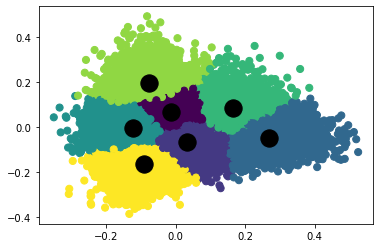

In [39]:
import matplotlib.pyplot as plt
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=1);